In [13]:
import numpy as np

import math
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import stats

print("hello")

hello


In [3]:
def origin_data():
    x = np.arange(0, 1, 0.02)
    y = np.sin(x*x + 1)
    return x, y

def add_noise(mu, sigma, y):
    y_noise = np.random.normal(mu, sigma, len(y))
    y = y + y_noise
    return y

In [4]:
x, y = origin_data()
y_origin = y
y_noise = add_noise(0, 0.04, y)

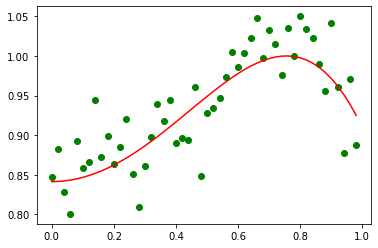

In [5]:
plt.plot(x, y_noise, 'go')
plt.plot(x, y, 'red')

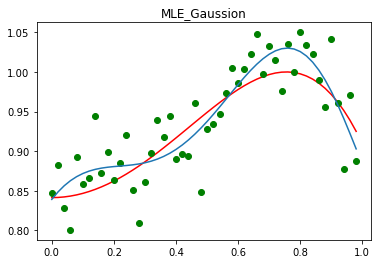

Estimated w is:  [    80.5711995    -634.87499855   2387.10475544  -5708.60698212
   9363.01320191 -10100.77834041   5640.07509551]


In [6]:
def basis_function_poly(x, M):
    f = np.power(x, M)
    return f

# def basis_function_gaussian(X, mu, sigma):
#     g = math.exp(-0.5 * np.matmul((X - mu), linalg.inv(sigma), (X - mu).T))
#     return g

def basis_function_gaussian_single(x, mu, sigma):
    g = math.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return g

def basis_function_sigmoid(x, mu, sigma):
    fi = (x - mu) / sigma
    s = 1 / (1 + np.exp(-fi))
    return s

def MLE_fitting(x, y, M):
    N = len(x)
    X = np.zeros([N, M])
    t = y.T
    for j in range(0, M):
        X.T[j] = basis_function_poly(x, j)

    pse = linalg.pinv(X)
    w = np.dot(pse, t)
    return w

def MLE_fitting_basis(x, y, M, mu, sigma):
    N = len(x)
    X = np.zeros([N, M])
    t = y.T
    y_fitting = np.zeros([N])
    for i in range(0, N):
        for j in range(0, M):
            # mu = 0.05m, sigma = 1
            X[i][j] = basis_function_gaussian_single(x[i], mu * j, sigma)
#             X[i][j] = basis_function_poly(x[i], j)
#             X[i][j] = basis_function_sigmoid(x[i], mu * j, sigma)

    pse = linalg.pinv(X)
    W = np.dot(pse, t)
    y_fitting = np.dot(X, W)
    
    return y_fitting, W

def MLE_basis_plot(x, y_origin, y_noise, M, mu, sigma):
    y_fitting, w = MLE_fitting_basis(x, y_noise, M, mu, sigma)

    plt.plot(x, y_origin, 'red')
    # plt.plot(x, y, 'ro') 
    plt.plot(x, y_noise, 'go')
    plt.plot(x, y_fitting)
    return y_fitting, w
y_MLE, W_MLE = MLE_basis_plot(x, y, y_noise, 7, 0.5, 1)
plt.title("MLE_Gaussion")
plt.show()
print("Estimated w is: ", W_MLE)


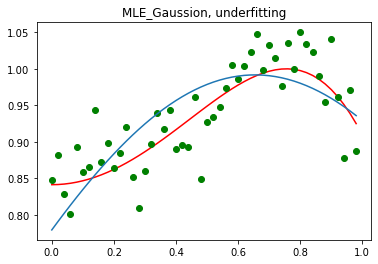

Text(0.5, 1.0, 'MLE_Gaussion, overfitting')

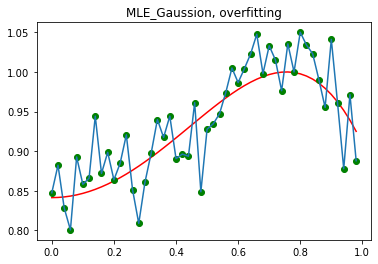

In [7]:
y_MLE, W_MLE = MLE_basis_plot(x, y, y_noise, 2, 0.5, 1)
plt.title("MLE_Gaussion, underfitting")
plt.show()
y_MLE, W_MLE = MLE_basis_plot(x, y, y_noise, 100, 0.02, 0.01)
plt.title("MLE_Gaussion, overfitting")


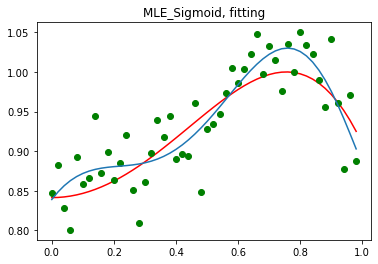

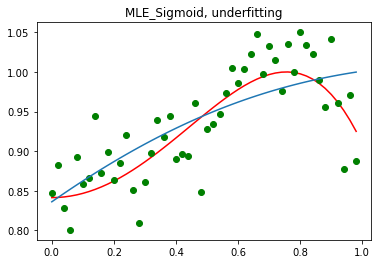

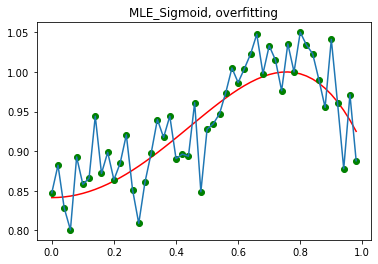

In [8]:
def origin_data():
    x = np.arange(0, 1, 0.02)
    y = np.sin(x*x + 1)
    return x, y

def add_noise(mu, sigma, y):
    y_noise = np.random.normal(mu, sigma, len(y))
    y = y + y_noise
    return y

def basis_function_sigmoid(x, mu, sigma):
    fi = (x - mu) / sigma
    s = 1 / (1 + np.exp(-fi))
    return s

def MLE_fitting_basis_sigmoid(x, y, M, mu, sigma):
    N = len(x)
    X = np.zeros([N, M])
    t = y.T
    y_fitting = np.zeros([N])
    for i in range(0, N):
        for j in range(0, M):
            X[i][j] = basis_function_sigmoid(x[i], mu * j, sigma)

    pse = linalg.pinv(X)
    W = np.dot(pse, t)
    y_fitting = np.dot(X, W)
    
    return y_fitting, W

def MLE_basis_plot_sigmoid(x, y_origin, y_noise, M, mu, sigma):
    y_fitting, w = MLE_fitting_basis_sigmoid(x, y_noise, M, mu, sigma)

    plt.plot(x, y_origin, 'red')
    # plt.plot(x, y, 'ro') 
    plt.plot(x, y_noise, 'go')
    plt.plot(x, y_fitting)
    return y_fitting, w

# x, y = origin_data()
# y_origin = y
# y_noise = add_noise(0, 0.04, y)

y_MLE, W_MLE = MLE_basis_plot_sigmoid(x, y, y_noise, 6, 0.5, 1)
plt.title("MLE_Sigmoid, fitting")
plt.show()

y_MLE, W_MLE = MLE_basis_plot_sigmoid(x, y, y_noise, 2, 0.5, 1)
plt.title("MLE_Sigmoid, underfitting")
plt.show()

y_MLE, W_MLE = MLE_basis_plot_sigmoid(x, y, y_noise, 50, 0.02, 0.02)


plt.title("MLE_Sigmoid, overfitting")
plt.show()
# print(W_MLE)
# print(y_MLE)


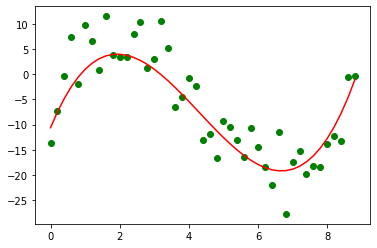

In [9]:
def origin_data():
    x = np.arange(0, 9, 0.2)
    y = 0.4345 * np.power(x, 3) - 5.607 * x * x + 16.78 * x - 10.61
    return x, y

def add_noise(mu, sigma, y):
    y_noise = np.random.normal(mu, sigma, len(y))
    y = y + y_noise
    return y

x, y = origin_data()
y_noise = add_noise(0, 4, y)

plt.plot(x, y_noise, 'go')
plt.plot(x, y, 'red')
    

Text(0.5, 1.0, 'MLE_Sigmoid, fitting')

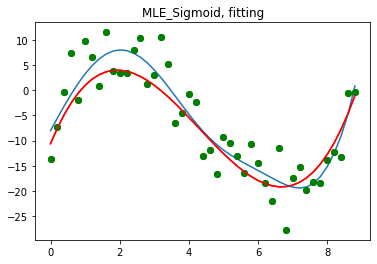

In [10]:
y_MLE, W_MLE = MLE_basis_plot_sigmoid(x, y, y_noise, 8, 3, 3)
plt.plot(x, y_noise, 'go')
plt.plot(x, y, 'red')
plt.title("MLE_Sigmoid, fitting")


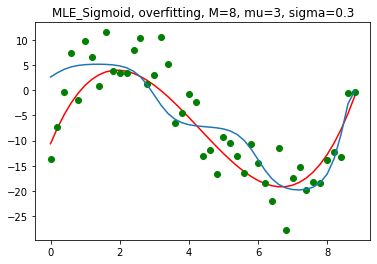

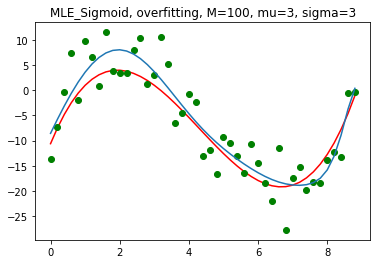

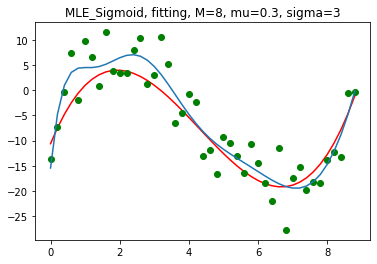

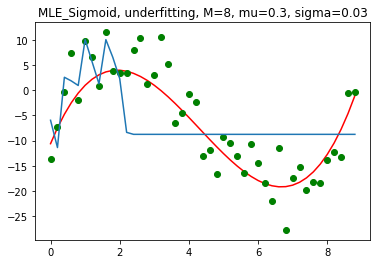

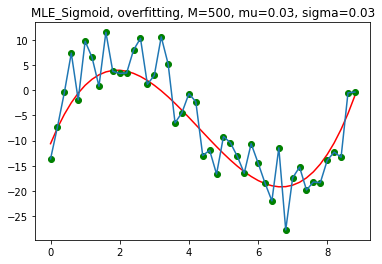

In [11]:
# Experiments with different parameters

plt.title("MLE_Sigmoid, overfitting, M=8, mu=3, sigma=0.3")
y_MLE, W_MLE = MLE_basis_plot_sigmoid(x, y, y_noise, 8, 3, 0.3)
plt.show()

plt.title("MLE_Sigmoid, overfitting, M=100, mu=3, sigma=3")
y_MLE, W_MLE = MLE_basis_plot_sigmoid(x, y, y_noise, 100, 3, 3)
plt.show()

plt.title("MLE_Sigmoid, fitting, M=8, mu=0.3, sigma=3")
y_MLE, W_MLE = MLE_basis_plot_sigmoid(x, y, y_noise, 8, 0.3, 3)
plt.show()

plt.title("MLE_Sigmoid, underfitting, M=8, mu=0.3, sigma=0.03")
y_MLE, W_MLE = MLE_basis_plot_sigmoid(x, y, y_noise, 8, 0.3, 0.03)
plt.show()

plt.title("MLE_Sigmoid, overfitting, M=500, mu=0.03, sigma=0.03")
y_MLE, W_MLE = MLE_basis_plot_sigmoid(x, y, y_noise, 500, 0.03, 0.03)
plt.show()

In [12]:
Discuss about advantages of Gaussian and sigmoid basis function over polynomial functions:
    The parameter sigma decides the shape of fitting curve. So as long as sigma is stable, model complexity has little influence on 
fitting curve. The overfitting problem is not serious with Gaussian and sigmoid basis function. 
    In terms of polynomial function, when m is large, any change of W would have huge affect on fitting curve, so the fluctuation of 
fitting performance would be really big.Therefore, polynomial function fitting would be really sensitive to change of data and 
anomalous data. However, for Gaussian and sigmoid basis function, anomolous data will not affect whole fitting curve, which means the
stability of fitting of basis function is much higher than polynomial function.
    With tuning mu and sigma, basis function fitting can cover more different distribution of points. Whereas polynomial functions have 
some limitation about fitting points with complicated distribution. Besides, the curve fitted by basis function is more smooth.


SyntaxError: invalid syntax (2948640349.py, line 1)